## Identifying the Dataset to be worked upon for the Project:
Identifying the Key that corresponds to the Table name to be invoked:

In [1]:
import hashlib
hashlib.md5("hrs170003".encode('utf-8')).hexdigest()

'2dbba0766b6c33e3f655c610bcf92d0d'

In [2]:
import pandas as pd
pd.read_csv("project1.csv")

,md5,table
0,31d28148917738af9cf5d0f09dee0faf,wage1
1,de32c03fdad28d4764b72a50f36c7054,vote1
2,028393ce1804c0aca50b845ae1cdbaef,elem94_95
3,2fe49ea18ede6aafc9528efb21fd29bb,mroz
4,d9615ca0c839ffe2118cc8a49b2580d5,ceosal2
5,f4516f4e5011124000a1e69393c301c2,attend
6,0b307b95ff2e57e2ea200c3316f9aac3,benefits
7,d52a795c6bd444df6b51039ce9dc6222,jtrain3
8,8455c3fa4ee352ec67742b2ffaef70d8,gpa1
9,9a651184e468c20088beb06ff05ee05a,card


Using the 'project.csv' file provided, the above key corresponds to the 'cps91' table from the 'wooldridge2.db' database.
Hence, importing that table from the database:

In [3]:
import sqlite3

con = sqlite3.connect('wooldridge2.db')
dataset = pd.read_sql('SELECT * FROM cps91',con)

print(dataset)
dataset.to_csv("Project1Dataset.csv")

      index  husage  husunion  husearns  huseduc  husblck  hushisp  hushrs  \
0         0      42       0.0       568       14        0        0      40   
1         1      26       0.0       600       14        0        0       0   
2         2      56       0.0      1500       14        0        0      40   
3         3      35       NaN         0       12        0        0      40   
4         4      42       0.0       450       11        0        0      45   
5         5      55       0.0       465       13        0        0      50   
6         6      68       NaN         0       16        0        0       0   
7         7      48       0.0       492       10        0        1      48   
8         8      38       NaN         0       14        0        0      65   
9         9      48       1.0      1923       12        0        0      21   
10       10      56       0.0       450       12        0        0      40   
11       11      37       0.0       523       12        0       

## Data dictionary:

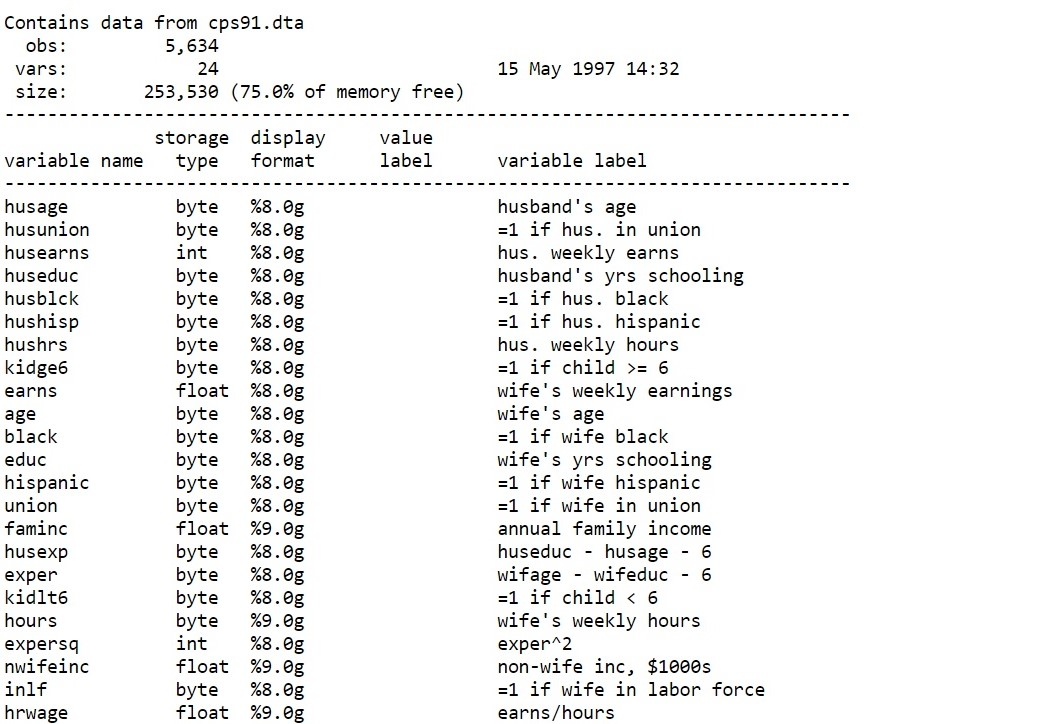

## Dataset cleansing and Data Preprocessing:
To be able to perform any sort of Exploratory Data Analysis, the dataset needs to be cleansed off unnecessary columns, redundant columns, missing values, etc.

In [54]:
print(dataset.columns)
# dropping the 'index' and 'expersq' columns because they are unnecessary for analysis here:
dataset = dataset.drop('index', axis=1)
dataset = dataset.drop('expersq', axis=1)
print(dataset.columns)

Index(['husage', 'husunion', 'husearns', 'huseduc', 'husblck', 'hushisp',
       'hushrs', 'kidge6', 'earns', 'age', 'black', 'educ', 'hispanic',
       'union', 'faminc', 'husexp', 'exper', 'kidlt6', 'hours', 'nwifeinc',
       'inlf', 'hrwage'],
      dtype='object')


In [70]:
# taking only those rows into consideration which do not have a missing value 
cleansed_data = dataset[(dataset.husunion.notnull()) & (dataset.union.notnull()) & (dataset.hrwage.notnull())]
cleansed_data.to_csv("Project1Dataset.csv")

## Exploratory Data Analysis:

Let us first find out the statistical summary of only the numerical variables in our dataset. Some of the things that this summary shall talk about are the means, minimum values, maximum values, standard deviations, 25th-50th-75th quartiles of the data in the various columns of the dataset, etc.

In [71]:
# statistical summary using .describe()
cleansed_data[['age','husage','educ','huseduc','exper','husexp','hours','hushrs','earns','husearns','faminc','nwifeinc']].describe()

,age,husage,educ,huseduc,exper,husexp,hours,hushrs,earns,husearns,faminc,nwifeinc
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000
mean,37.960373,40.219503,13.458042,13.488345,18.502720,20.731158,35.731935,42.437063,370.958042,605.592075,45546.328671,28.071259
std,9.258770,9.951007,2.421802,2.725500,9.629262,10.346390,10.683902,12.922071,238.711044,334.697624,28621.202062,22.946979
min,18.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000
25%,31.000000,32.000000,12.000000,12.000000,11.000000,13.000000,32.000000,40.000000,204.000000,380.000000,27500.000000,12.820000
50%,37.000000,39.000000,13.000000,13.000000,18.000000,19.000000,40.000000,40.000000,325.000000,538.000000,45000.000000,24.194000
75%,44.000000,47.000000,16.000000,16.000000,25.000000,28.000000,40.000000,50.000000,485.750000,750.000000,55000.000000,36.796000
max,59.000000,69.000000,18.000000,18.000000,44.000000,55.000000,120.000000,99.000000,2884.500000,1923.000000,112500.000000,111.200000


### Statistical Inferences:
The following inferences are made from the above statistical summary:
1. The mean values, minimum values and maximum values of age of a wife and a husband is not very different.
2. Even though the wife and the husband has the same average number of years of educations and almost the same years of experience, the wife earns far less than what the husband earns weekly. This may be because a husband works more hours in a week than a wife does.
3. A non-wife earns far more annually than a wife does.

### Bar Plots:
The following two plots show the age-wise distribution of wives and husbands respectively:

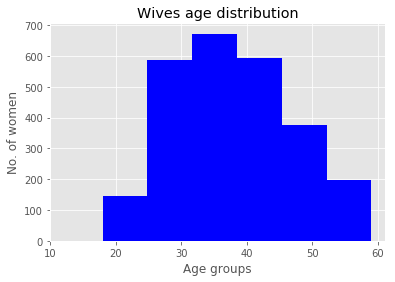

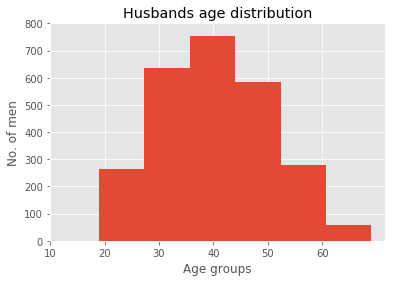

In [227]:
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Project1Dataset.csv")

# most women are between ages 30 and 40
plt.hist(data.age, bins=6, color='blue')
plt.xlabel('Age groups')
plt.ylabel('No. of women')
plt.xticks(range(10,70,10))
plt.yticks(range(0,800,100))
plt.title('Wives age distribution')
plt.show()

# most men are between ages 35 and 45
plt.hist(data.husage, bins=6)
plt.xlabel('Age groups')
plt.ylabel('No. of men')
plt.xticks(range(10,70,10))
plt.yticks(range(0,900,100))
plt.title('Husbands age distribution')
plt.show()

###### Box plot Inferences:
1. The modal age group for women is 30-40 years of age, which is also the class group where their mean lies (~ 38 years of age)
2. The modal age group for men is 35-45 years of age, which is also the class group where their mean lies (~ 40 years of age)
3. We can also see from the following plot that about 1/3rd (~800 wives and husbands) of the working population lies between the age of 35-45 years.

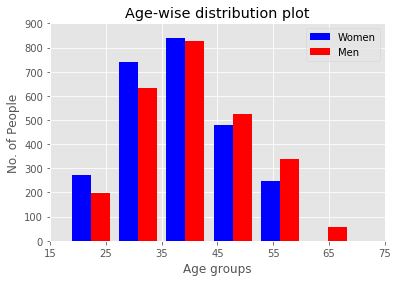

In [228]:
# most of the working wives and husbands lie in the age group of 35-45 years
w_age = data['age']
h_age = data['husage']
legend = ['Women', 'Men']
plt.hist([w_age,h_age], color=['blue','red'], bins=6)
plt.xlabel('Age groups')
plt.ylabel('No. of People')
plt.legend(legend)
plt.xticks(range(15,76,10))
plt.yticks(range(0,1000,100))
plt.title('Age-wise distribution plot')
plt.show()

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- Comparative Analysis and Inference:
- The following plots of comparison show that a majority of women have obtained more years of education than men.
- They also have equal or more experience than men.
- Yet, most men earn more than women do.
- Also, husbands contribute more to the family financially than wives do.

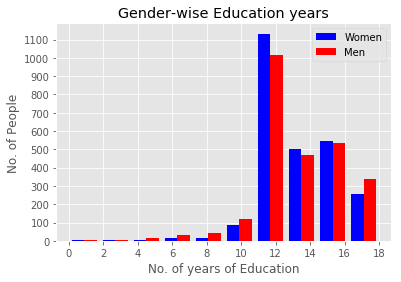

In [229]:
# most of the wives have more years of education than men do
w_educ = data['educ']
h_educ = data['huseduc']
legend = ['Women', 'Men']
plt.hist([w_educ,h_educ], color=['blue','red'], bins=10)
plt.xlabel('No. of years of Education')
plt.ylabel('No. of People')
plt.legend(legend)
plt.xticks(range(0,20,2))
plt.yticks(range(0,1200,100))
plt.title('Gender-wise Education years')
plt.show()

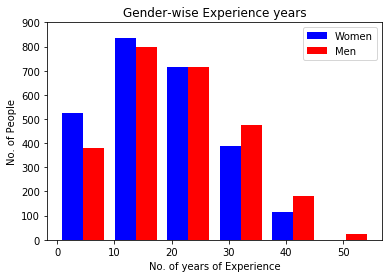

In [137]:
# most of the wives have more years of experience than men do
w_exp = data['exper']
h_exp = data['husexp']
legend = ['Women', 'Men']
plt.hist([w_exp,h_exp], color=['blue','red'], bins=6)
plt.xlabel('No. of years of Experience')
plt.ylabel('No. of People')
plt.legend(legend)
plt.xticks(range(0,60,10))
plt.yticks(range(0,1000,100))
plt.title('Gender-wise Experience years')
plt.show()

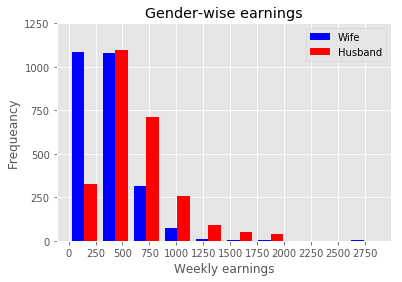

In [230]:
# yet, most husbands earn more than wives do
w_earns = data['earns']
h_earns = data['husearns']
legend = ['Wife', 'Husband']
plt.hist([w_earns,h_earns], color=['blue','red'])
plt.xlabel('Weekly earnings')
plt.ylabel('Frequeancy')
plt.legend(legend)
plt.xticks(range(0,3000,250))
plt.yticks(range(0,1500,250))
plt.title('Gender-wise earnings')
plt.show()

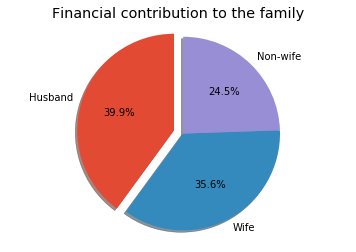

In [231]:
# Husbands contribute more to the family financially than wives do
hus_contri = pd.read_csv('Project1Dataset.csv')['husearns'].mean()*52
wife_contri = pd.read_csv('Project1Dataset.csv')['earns'].mean()*52
nWife_contri = pd.read_csv('Project1Dataset.csv')['nwifeinc'].mean()*1000

labels = 'Husband', 'Wife', 'Non-wife'
sizes = [hus_contri,wife_contri,nWife_contri]
sizes.sort(reverse=True)
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Financial contribution to the family')
plt.show()

### Correlation matrix:
The following correlation matrix is plotted to identify strong relations among the different variables in the dataset.

In [236]:
data = pd.read_csv('Project1Dataset.csv')
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\heta2\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,husage,husunion,husearns,huseduc,husblck,hushisp,hushrs,kidge6,earns,age,black,educ,hispanic,union,faminc,husexp,exper,kidlt6,hours,nwifeinc,inlf,hrwage
husage,1,0.061,0.16,-0.011,-0.0098,-0.014,-0.1,0.097,0.089,0.9,-0.0088,-0.039,-0.026,0.083,0.17,0.96,0.87,-0.42,0.0014,0.18,nan,0.087
husunion,0.061,1,-0.00074,-0.058,0.062,-0.036,-0.041,0.061,-0.026,0.056,0.064,-0.037,-0.036,0.18,0.0038,0.074,0.063,-0.0028,-0.017,0.014,nan,-0.017
husearns,0.16,-0.00074,1,0.41,-0.1,-0.099,0.16,0.05,0.32,0.16,-0.1,0.29,-0.081,0.033,0.49,0.05,0.079,-0.081,-0.057,0.48,nan,0.37
huseduc,-0.011,-0.058,0.41,1,-0.076,-0.26,0.097,0.0031,0.3,-0.0019,-0.07,0.58,-0.22,0.037,0.34,-0.27,-0.15,0.016,0.0093,0.29,nan,0.32
husblck,-0.0098,0.062,-0.1,-0.076,1,-0.055,-0.033,0.0072,-0.014,-0.011,0.95,-0.027,-0.051,0.059,-0.07,0.011,-0.0042,0.025,0.041,-0.084,nan,-0.03
hushisp,-0.014,-0.036,-0.099,-0.26,-0.055,1,-0.042,0.0026,-0.043,-0.022,-0.054,-0.22,0.76,0.023,-0.087,0.056,0.033,0.069,0.045,-0.086,nan,-0.058
hushrs,-0.1,-0.041,0.16,0.097,-0.033,-0.042,1,0.014,-0.015,-0.097,-0.031,0.082,-0.035,-0.0086,0.035,-0.13,-0.11,0.065,-0.032,0.055,nan,-0.0076
kidge6,0.097,0.061,0.05,0.0031,0.0072,0.0026,0.014,1,-0.068,0.098,0.0064,-0.028,0.0044,0.033,0.028,0.092,0.1,-0.43,-0.091,0.067,nan,-0.043
earns,0.089,-0.026,0.32,0.3,-0.014,-0.043,-0.015,-0.068,1,0.1,-0.022,0.4,-0.047,0.19,0.42,0.0064,-0.0033,-0.073,0.45,0.08,nan,0.85
age,0.9,0.056,0.16,-0.0019,-0.011,-0.022,-0.097,0.098,0.1,1,-0.013,-0.026,-0.024,0.093,0.18,0.86,0.97,-0.43,0.019,0.19,nan,0.094


###### According to the correlation matrix above, the following inferences are made:
1. There is a strong relation between the wife's and the husband's age (~0.89-0.90). This indicates that women generally get married to men who are close to their age.
2. There is a strong relation between the race of the wives and their husbands. This means that women generally marry men who belong to their race:
    - black couple(~ 0.95)
    - hispanic couple(~ 0.76)
    (refer graph plots given below)
3. The couple's experience and their age shows a direct relation (~ 0.97).
4. There is a strong relationship between the family income (wife's income + husband's income) and the non-wife's income(~ 0.91). This indicates that those families where the couple's income is low/zero, are financially dependant on the non-wife's income.

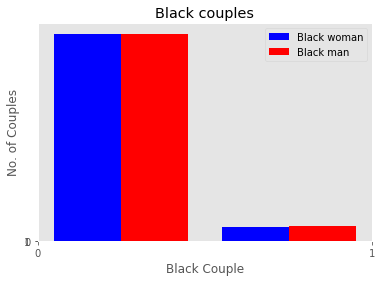

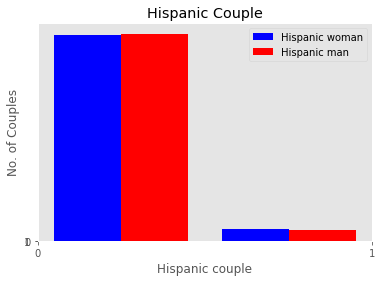

In [233]:
# women marry men of their same race
data = pd.read_csv("Project1Dataset.csv")

w_black = data['black']
h_black = data['husblck']
legend = ['Black woman', 'Black man']
plt.hist([w_black,h_black], color=['blue','red'], bins=2)
plt.xlabel('Black Couple')
plt.ylabel('No. of Couples')
plt.legend(legend)
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.title('Black couples')
plt.show()

w_hisp = data['hispanic']
h_hisp = data['hushisp']
legend = ['Hispanic woman', 'Hispanic man']
plt.hist([w_hisp,h_hisp], color=['blue','red'], bins=2)
plt.xlabel('Hispanic couple')
plt.ylabel('No. of Couples')
plt.legend(legend)
plt.xticks(range(0,2))
plt.yticks(range(0,2))
plt.title('Hispanic Couple')
plt.show()

It can be seen clearly that women usually marry men who belong to their same race.
###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Linear Regression to predict Wife's income:
Based on the correlation matrix, we can predict the wife's income using a wife's years of education and years of experience as predictor variables

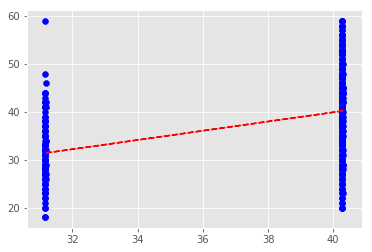

In [238]:
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from matplotlib.pyplot import *
from scipy.interpolate import *

style.use('ggplot')

data = pd.read_csv('Project1Dataset.csv')
X2 = data.iloc[:2000, 12].values.reshape(-1, 1)
X3 = data.iloc[:2000, 17].values.reshape(-1, 1)
Y = data.iloc[:2000, 9].values.reshape(-1, 1) # -1 to calculate the dimension of rows, but 1 column

X_pred2= data.iloc[2000:,12].values.reshape(-1, 1)
X_pred3 = data.iloc[2000:,17].values.reshape(-1, 1)
X = pd.DataFrame(X2)
X['exper'] = X3

X_pred = pd.DataFrame(X_pred2)
X_pred['exper'] = X_pred3

Y = pd.DataFrame(Y)

Y_real = data.iloc[2000:,9].values.reshape(-1, 1)
linear_regressor = LinearRegression() # object of class
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X_pred)
new = pd.DataFrame(X_pred)
new['Predicted income for wife'] = Y_pred
new['Wife current earnings'] = Y_real
new['difference'] = Y_pred - Y_real
Y_pred = pd.DataFrame(Y_pred)
Y_real = pd.DataFrame(Y_real)
x = Y_pred
y = Y_real

x = numpy.array(x[0])
y = numpy.array(y[0])

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.scatter(x, y, c='blue')
plt.show()

We can predict that with increase in education and experience, a wife's weekly income will increase. We can perform similar analysis on Husband's data and find out the total family income later, if required.

## Key Insights:
1. Even though a wife and a husband have the same average number of years of educations and almost the same average number of years of experience, the wife earns far less than what the husband earns weekly, on average. This may be because a husband works more hours in a week than a wife does.
2. A non-wife earns far more annually than a wife does. This may be because a wife might have to look after the husband and the kid, if any.
3. The modal age group for women is 30-40 years of age, which is also the class group where their mean lies (~ 38 years of age).
4. The modal age group for men is 35-45 years of age, which is also the class group where their mean lies (~ 40 years of age).
5. About 1/3rd (~800 wives and husbands) of the working population lies between the age of 35-45 years.
6. Husbands contribute more to the family financially than wives do.
7. Well-educated women generally get married to well-educated men.
8. Women generally marry men who belong to their same race:
9. There is a strong relationship between the family income (wife's income + husband's income) and the non-wife's income(~ 0.91). Those families where the couple's income is low/zero, are financially dependant on the non-wife's income.
10. Using linear regression, we have predicted that with increase in education and experience, a wife's weekly income will increase. We can perform similar analysis on Husband's data and find out the total family income later, if required.